In [4]:
#Handling imports
# Importing required libraries to get started
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Import dataset
dataset = pd.read_csv('data/pima_diabetes_20_per.csv')
print(dataset.describe())
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean     75.005208  100.583859      77.937342      29.141116   69.295492   
std     180.918034   52.384347      30.721996      25.072286  107.797263   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   85.000000      64.000000       3.192330    0.000000   
50%       4.000000  108.000000      74.000000      27.000000   23.398656   
75%       9.000000  134.000000      86.000000      40.000000  105.000000   
max     767.000000  199.000000     197.058113     111.159153  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    40.837890                  5.980830   27.717036    0.348958  
std     50.769659                 12.553476   15.960957    0.476951  
min      0.000000                  

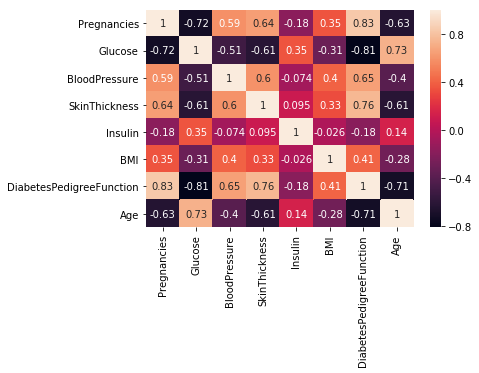

In [6]:
sns.heatmap(X.corr(), annot = True)

In [7]:
#Feature Extraction
## Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X)

print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped
X = X.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

   Pregnancies   Glucose  BloodPressure  SkinThickness    Insulin      BMI  \
0            1  3.971715     147.056372      70.956019  36.397967  2.99791   

   DiabetesPedigreeFunction       Age  
0                 36.632056  5.001434  
[  1.           3.97171468 147.0563721   70.95601876  36.39796742
   2.99790957  36.63205644   5.00143364]
   Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0            1    3.971715     147.056372      70.956019   36.397967   
1            1   85.000000      66.000000      29.000000    0.000000   
2            8  183.000000      64.000000       0.000000    0.000000   
3            1   89.000000      66.000000      23.000000   94.000000   
4            0  137.000000      40.000000      35.000000  168.000000   

        BMI        Age  
0   2.99791   5.001434  
1  26.60000  31.000000  
2  23.30000  32.000000  
3  28.10000  21.000000  
4  43.10000  33.000000  
[[3.97171468e+00 1.47056372e+02 3.63979674e+01 2.99790957e+00]
 [8.500000

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [9]:
#Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [10]:
#Implement SVM with Linear Kernel
classifier = SVC(random_state=0, kernel='rbf',probability=True)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [11]:
#Predict the test set results
y_pred = classifier.predict(X_test)

In [12]:
#Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[98  9]
 [27 20]]
0.5263157894736842
0.7662337662337663


In [13]:
#Saving the Confusion Matrix and splitting into 4 variables 
# save confusion matrix and slice into four pieces
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[98  9]
 [27 20]]


In [14]:
#Calculating Model Accuracy from the Confusion Matrix
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.7662337662337663
0.7662337662337663


In [15]:
#Calculating Classification Error from the Confusion Matrix
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.23376623376623376
0.23376623376623373


In [16]:
#Calculate Sensitivity from the Confusion Matrix
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.425531914893617
0.425531914893617


In [17]:
#Calculate Specificity from the Confusion Matrix
specificity = TN / (TN + FP)

print(specificity)

0.9158878504672897


In [18]:
#Calculate the False Positive Rate from the Confusion Matrix
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.08411214953271028
0.08411214953271029


In [19]:
#Calcualte Precision from the Confusion Matrix
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.6896551724137931
0.6896551724137931


In [20]:
#Steps for adjusting the Threshold
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
classifier.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [21]:
# print the first 10 predicted probabilities of class membership
classifier.predict_proba(X_test)[0:10]

array([[0.14555159, 0.85444841],
       [0.8082198 , 0.1917802 ],
       [0.80963816, 0.19036184],
       [0.17730919, 0.82269081],
       [0.7608475 , 0.2391525 ],
       [0.85179696, 0.14820304],
       [0.25564031, 0.74435969],
       [0.12579796, 0.87420204],
       [0.73754922, 0.26245078],
       [0.63243427, 0.36756573]])

In [22]:
# print the first 10 predicted probabilities for class 1
classifier.predict_proba(X_test)[0:10, 1]

array([0.85444841, 0.1917802 , 0.19036184, 0.82269081, 0.2391525 ,
       0.14820304, 0.74435969, 0.87420204, 0.26245078, 0.36756573])

In [23]:
# store the predicted probabilities for class 1
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

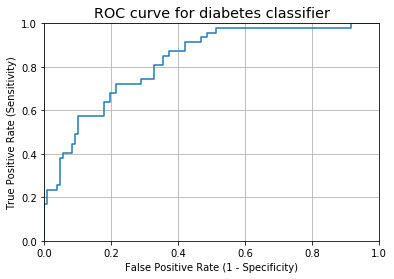

In [24]:
#Plotting ROC Curve
# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [25]:
#Finding out the AUC
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8275999204613242


In [26]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(classifier, X, y, cv=10, scoring='roc_auc').mean()

C:\Users\souro\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.6087521367521368